<a href="https://colab.research.google.com/github/Tien84/Face-Detection/blob/master/GridSearch_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas

In [2]:
!pip install numpy

In [40]:
!pip install matplotlib

In [4]:
!pip install sklearn

In [5]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

data = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv', header=0, index_col=0)
#data= data[::-1] 
data.index.freg='Date'
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.500000,58.928570,58.428570,58.747143,56.011238,75564699
2012-01-04,58.599998,59.240002,58.468571,59.062859,56.312252,65061108
2012-01-05,59.278572,59.792858,58.952858,59.718571,56.937424,67816805
2012-01-06,59.967140,60.392857,59.888573,60.342857,57.532646,79596412
2012-01-09,60.788570,61.107143,60.192856,60.247143,57.441391,98505792
...,...,...,...,...,...,...
2020-01-03,297.149994,300.579987,296.500000,297.429993,293.598297,36633878
2020-01-06,293.790009,299.959991,292.750000,299.799988,295.937744,29644644
2020-01-07,299.839996,300.899994,297.480011,298.390015,294.545959,26207813


In [48]:
# summarize shape
print(data.shape)

(2018, 6)


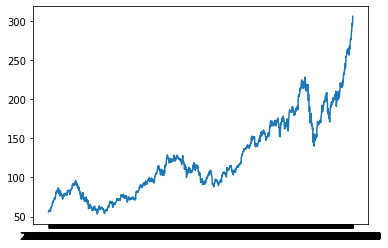

In [50]:
from matplotlib import pyplot
# plot
pyplot.plot(data['Adj Close'])
pyplot.show()

In [35]:
open_price = data.iloc[:,1:2]
train_set = open_price[:1345].values
test_set = open_price[1345:].values
print("Train size: ",train_set.shape)
print("Test size:",test_set.shape)

Train size:  (1345, 1)
Test size: (673, 1)


In [51]:
from sklearn.model_selection import train_test_split
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

In [52]:

# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values

In [36]:
from sklearn.model_selection import train_test_split
X_train, y_train = train_test_split(train_set,test_size= 0.3, random_state=1345)
X_test, y_test = train_test_split(test_set, test_size= 0.3, random_state=673)

In [37]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=2018)

In [38]:
# make a dictionary of hyperparameter values to search
search_space = {
    "n_estimators" : [100, 200, 500],
    "max_depth" : [3, 6, 9],
    "gamma" : [0.01, 0.1],
    "learning_rate" : [0.001, 0.01, 0.1, 1]
}

In [39]:
from sklearn.model_selection import GridSearchCV
# train the model on train set 
#model = SVC() 
GS = GridSearchCV(estimator= xgb_model,
                    param_grid= search_space,
                    scoring= ["r2", "neg_root_mean_squared_error"],
                    refit = 'r2',
                    cv = 5,
                    verbose = 4) 
GS.fit(X_train,y_train)
#GS.fit(X_test,y_test) 

ValueError: ignored

In [ ]:
# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions)) 

In [ ]:
# train the model on train set 
model = SVC() 
model.fit(X_train, y_train) 
  
# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [ ]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1, gamma=0.0001)


In [ ]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

